In [155]:
import numpy as np
from PQmodel import PQ 
import matplotlib.pylab as plt
from stockwell import st
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split

In [156]:
def build_data(data,t,fmin=0,fmax=30):
    Muestras,tSenal,_=data.shape
    db,dbl=[],[]
    df = 1/(t[-1]-t[0]) 
    for j in range(Muestras):
        for k in range (tSenal):
            y=np.zeros(tSenal)
            y[k]=1
            db.append(np.abs(st.st(data[j,k], int(fmin/df), int(fmax/df))))
            dbl.append(y)

    return np.array(db),np.array(dbl)

In [157]:
ciclos = 10
freq =60
fs =3600
mpc= fs/freq
Model = PQ(Cicles=ciclos,FS=fs,Frecuency=freq,InicioDisturbio=0,PeriodoDisturbio=5)
t = np.linspace(0,ciclos/freq,int(mpc*ciclos))

In [158]:
Signal_List =[1,2,3,4,5]#[1,2,3,4,5,6,9,16]
Signas_perEvent=50
a = Model.PQselectivo(Signas_perEvent,Signal_List)


In [159]:
data,y=build_data(a,t)
n_signals=len(Signal_List)
data=data.reshape(n_signals*Signas_perEvent,6,600,1)
X_train, X_val, y_train, y_val = train_test_split(data, y, test_size=0.2, random_state=42)


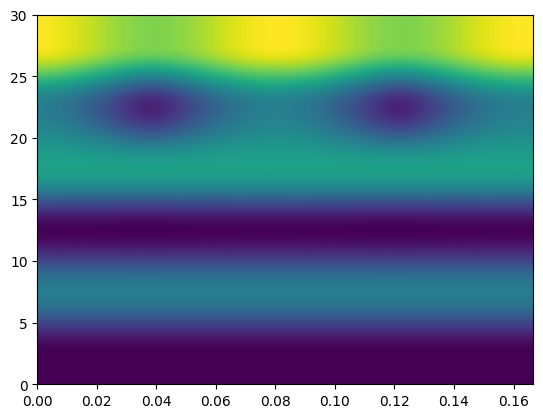

In [160]:
extent = (t[0], t[-1], 0, 30)
plt.imshow(abs(data[1,:]), origin='lower',extent=extent)
plt.axis('tight')
plt.show()

In [161]:
# Crear un modelo secuencial
model = Sequential()

# Capa de convolución con 32 filtros de 3x3, activación ReLU
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(6,600,1)))

# Capa de convolución con 64 filtros de 3x3, activación ReLU
model.add(Conv2D(128, (3, 3), activation='relu'))

# Capa de Max Pooling 2D
model.add(MaxPooling2D(pool_size=(2, 2)))

# Capa de Flatten para convertir los mapas de características en un vector unidimensional
model.add(Flatten())

# Capa completamente conectada con 64 neuronas y activación ReLU
model.add(Dense(64, activation='relu'))

# Capa de salida con activación softmax para la clasificación
model.add(Dense(n_signals, activation='softmax'))  # Aquí 10 es el número de clases

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 4, 598, 64)        640       
                                                                 
 conv2d_64 (Conv2D)          (None, 2, 596, 128)       73856     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 1, 298, 128)      0         
 g2D)                                                            
                                                                 
 flatten_26 (Flatten)        (None, 38144)             0         
                                                                 
 dense_52 (Dense)            (None, 64)                2441280   
                                                                 
 dense_53 (Dense)            (None, 5)                 325       
                                                     

In [162]:
history = model.fit(X_train, y_train,
                    epochs=150,
                    batch_size=100)#,validation_data=(X_val, y_val))

Epoch 1/150
2/2 [==============================] - 1s 52ms/step - loss: 1.5972 - accuracy: 0.2100
Epoch 2/150
2/2 [==============================] - 0s 50ms/step - loss: 1.5111 - accuracy: 0.2100
Epoch 3/150
2/2 [==============================] - 0s 34ms/step - loss: 1.4301 - accuracy: 0.3300
Epoch 4/150
2/2 [==============================] - 0s 42ms/step - loss: 1.3593 - accuracy: 0.4100
Epoch 5/150
2/2 [==============================] - 0s 34ms/step - loss: 1.2752 - accuracy: 0.4850
Epoch 6/150
2/2 [==============================] - 0s 44ms/step - loss: 1.2071 - accuracy: 0.5150
Epoch 7/150
2/2 [==============================] - 0s 43ms/step - loss: 1.1183 - accuracy: 0.5100
Epoch 8/150
2/2 [==============================] - 0s 41ms/step - loss: 1.0223 - accuracy: 0.4900
Epoch 9/150
2/2 [==============================] - 0s 40ms/step - loss: 0.9481 - accuracy: 0.5100
Epoch 10/150
2/2 [==============================] - 0s 41ms/step - loss: 0.8904 - accuracy: 0.5350
Epoch 11/150
2/2 [=

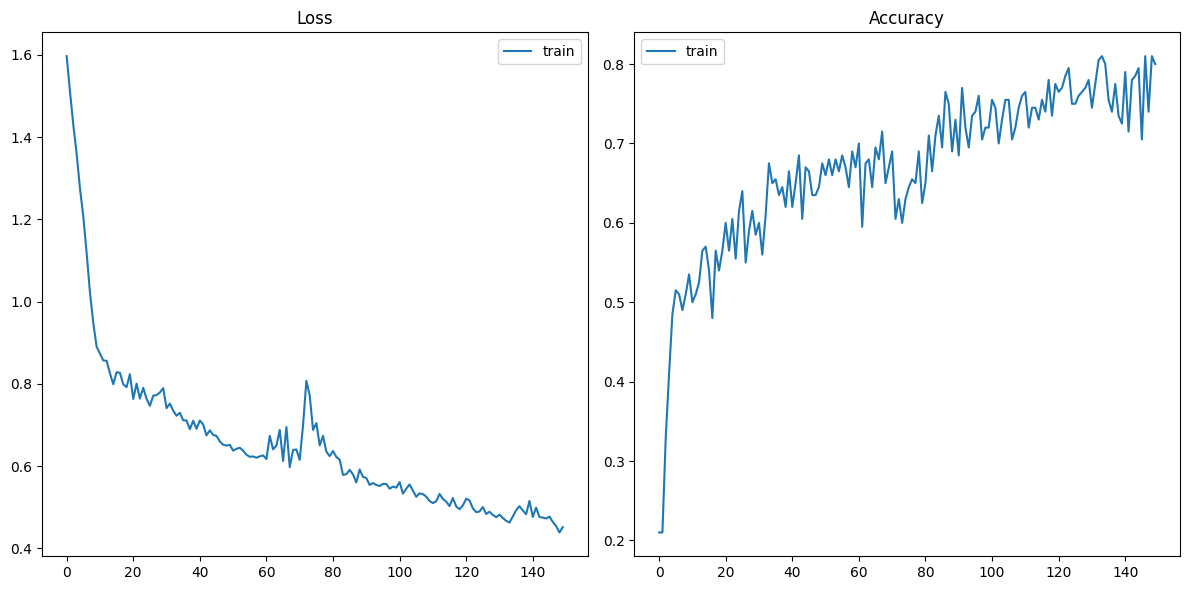

In [165]:
# Mostrar la pérdida y la precisión durante el entrenamiento
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['val_loss'], label='val')
plt.title('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train')
#plt.plot(history.history['val_accuracy'], label='val')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Example

In the following code it shows how to use a stockwell transform. You can see how to install stockwell library in https://pypi.org/project/stockwell/1.0/ and a brief summary how to use it

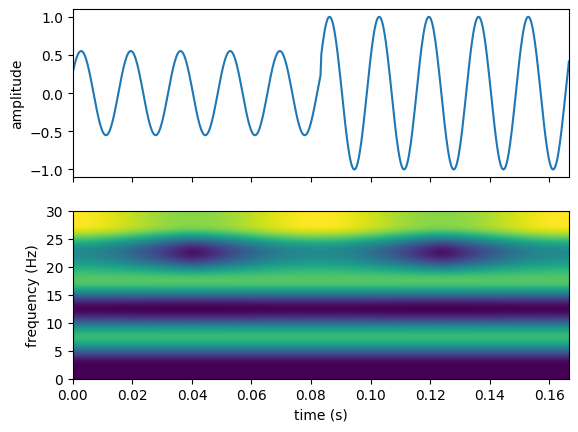

In [164]:
m=0
t = np.linspace(0,1/6,600)
df = 1/(t[-1]-t[0])  # sampling step in frequency domain (Hz)
fmin=0
fmax=30
stock = st.st(a[m,0], int(fmin/df), int(fmax/df))
extent = (t[0], t[-1], fmin, fmax)

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(t, a[m,0])
ax[0].set(ylabel='amplitude')
ax[1].imshow(np.abs(stock), origin='lower', extent=extent)
ax[1].axis('tight')
ax[1].set(xlabel='time (s)', ylabel='frequency (Hz)')
plt.show()